# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Explore unknown JSON schemas
* Access and manipulate data inside a JSON file
* Convert JSON to alternative data formats

## Loading the JSON file

Load the data from the file disease_data.json.

In [1]:
#Your code here 
import json

f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [9]:
#Your code here
# First level
print('First Level Type:', type(data))
print('First Level Dictionary Keys:', data.keys())
# Second level
print('Second Level (1st Key) Type:', type(data['meta']))
print('Second Level (1st Key) Dictinary Keys:', data['meta'].keys())
print('Second Level (2nd Key) Type:', type(data['data']))
print('Second Level (2nd Key) List Length:', len(data['data']))

First Level Type: <class 'dict'>
First Level Dictionary Keys: dict_keys(['meta', 'data'])
Second Level (1st Key) Type: <class 'dict'>
Second Level (1st Key) Dictinary Keys: dict_keys(['view'])
Second Level (2nd Key) Type: <class 'list'>
Second Level (2nd Key) List Length: 60266


## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [17]:
#Your code here
import pandas as pd

# Find column names
print('Meta > View Dictinary Keys:\n', data['meta']['view'].keys())
print('\nMeta > View > Columns Type:', type(data['meta']['view']['columns']))
print('Meta > View > Columns Length:', len(data['meta']['view']['columns']))

df = pd.DataFrame(data['data'])
df.columns = [item['name'] for item in data['meta']['view']['columns']]
df.head()

Meta > View Dictinary Keys:
 dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

Meta > View > Columns Type: <class 'list'>
Meta > View > Columns Length: 42


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [31]:
print('Columns:', df.columns)
print('\nTopics:\n', df.Topic.value_counts(normalize=True))
print('\nAsthma Questions:\n', df[df.Topic == 'Asthma'].Question.value_counts(normalize=True))


Columns: Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

Topics:
 Diabetes                                           0.164189
Chronic Obstructive Pulmonary Disease              0.115488
Overarching Conditions            

In [44]:
# Asthma subset
df_asthma = df[df.Question == 'Current asthma prevalence among adults aged >= 18 years']
print('Subset has more rows than States:', len(df_asthma))
df_asthma.head()

Subset with more rows than States: 870


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
4725,4726,786EA689-97C8-45C7-B733-9CF01D8AEB62,4726,1527194522,959778,1527194522,959778,None,2016,2016,...,17,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5529,5530,AC33E8A2-F507-48D5-B02C-9179EDC425E3,5530,1527194522,959778,1527194522,959778,None,2016,2016,...,18,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5632,5633,1E855D58-2A98-44E2-A062-AE1E8A2F7DB6,5633,1527194522,959778,1527194522,959778,None,2016,2016,...,19,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
6777,6778,D300D76F-6293-4C41-B47F-AB8A93426EE2,6778,1527194522,959778,1527194522,959778,None,2016,2016,...,20,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7034,7035,5868F7F7-82F1-4D72-A144-767DFA87D581,7035,1527194522,959778,1527194522,959778,None,2016,2016,...,21,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None


In [59]:
# Determine filtering criteria

#print(df.ResponseID.value_counts(normalize=True))
#print(df.LocationID.value_counts(normalize=True))
print(df.TopicID.value_counts(normalize=True))
#print(df.QuestionID.value_counts(normalize=True))
print(df.DataValueTypeID.value_counts(normalize=True))
print(df.StratificationCategoryID1.value_counts(normalize=True))
print(df.StratificationID1.value_counts(normalize=True))
print(df.StratificationCategoryID2.value_counts(normalize=True))
print(df.StratificationID2.value_counts(normalize=True))
print(df.StratificationCategoryID3.value_counts(normalize=True))
print(df.StratificationID3.value_counts(normalize=True))

DIA     0.164189
COPD    0.115488
OVC     0.092739
ART     0.086616
TOB     0.078485
AST     0.077573
NPAW    0.069492
ALC     0.068530
ORH     0.057744
CVD     0.057744
CAN     0.041400
OLD     0.028872
MTH     0.019829
IMM     0.014436
CKD     0.014436
DIS     0.007035
RPH     0.005393
Name: TopicID, dtype: float64
CRDPREV       0.498341
AGEADJPREV    0.422212
AGEADJMEAN    0.036090
MEAN          0.036090
PRCT          0.005476
YESNO         0.001792
Name: DataValueTypeID, dtype: float64
RACE       0.631534
GENDER     0.231673
OVERALL    0.136794
Name: StratificationCategoryID1, dtype: float64
OVR     0.136794
WHT     0.126307
HIS     0.126307
BLK     0.126307
MRC     0.124548
OTH     0.124548
GENM    0.115836
GENF    0.115836
AIAN    0.001759
ASN     0.001759
Name: StratificationID1, dtype: float64
Series([], Name: StratificationCategoryID2, dtype: float64)
Series([], Name: StratificationID2, dtype: float64)
Series([], Name: StratificationCategoryID3, dtype: float64)
Series([], Name

In [65]:
# Filter Asthma subset
df_asthma_final = df[(df.Question == 'Current asthma prevalence among adults aged >= 18 years')
         & (df.TopicID == 'AST') 
         & (df.DataValueTypeID == 'CRDPREV')
         & (df.StratificationCategoryID1 == 'OVERALL')
         & (df.StratificationID1 == 'OVR')]
df_asthma_final = df_asthma_final.sort_values(by='LocationAbbr')
print(df_asthma_final.shape)
df_asthma_final.head()

(55, 42)


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9372,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9371,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9373,9371,5FCE0D49-11FD-4545-B9E7-14F503123105,9371,1527194523,959778,1527194523,959778,None,2016,2016,...,04,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9375,9373,D3F00ED2-A069-4E40-B42B-5A2528A91B6F,9373,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


Text(0.5, 0, 'State')

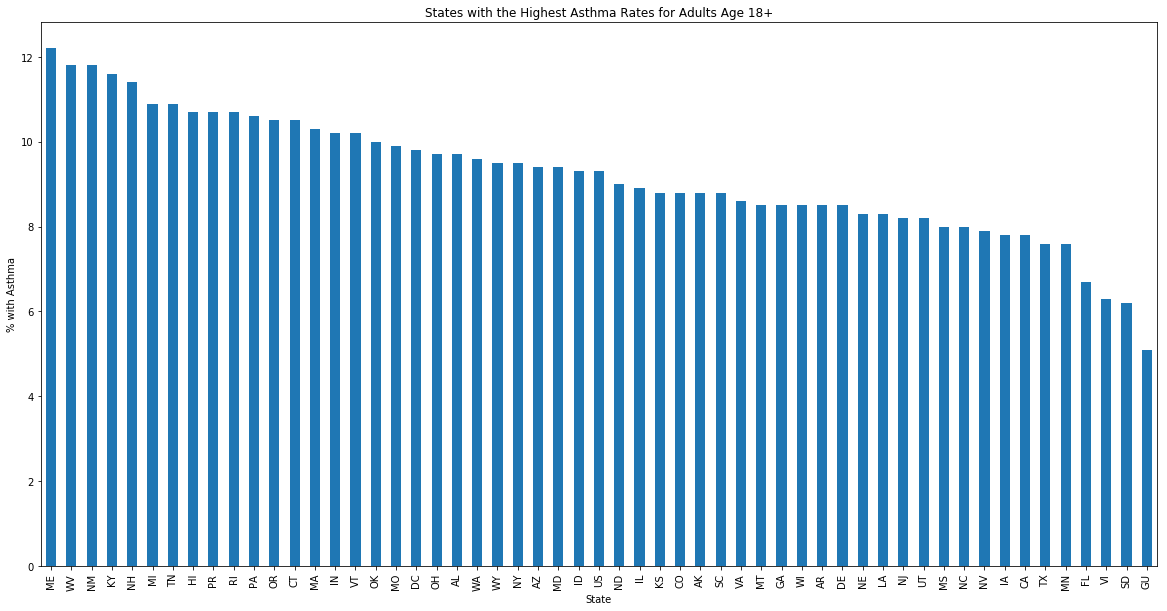

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

df_asthma_final.DataValue = df_asthma_final.DataValue.astype(float)
df_asthma_final = df_asthma_final.sort_values(by='DataValue', ascending=False)
df_asthma_final.set_index('LocationAbbr')['DataValue'].plot(kind='bar', figsize=(20,10))
plt.title('States with the Highest Asthma Rates for Adults Age 18+')
plt.ylabel('% with Asthma')
plt.xlabel('State')

## Level-Up!
## Create a function (or class) that returns an outline of the schema structure like this: 
<img src="images/outline.jpg" width="350">

Rules:
* Your outline should follow the numbering outline above (I, A, 1, a, i).
* Your outline should be properly indented! (Four spaces or one tab per indentation level.)
* Your function goes to at least a depth of 5 (Level-up: create a parameter so that the user can specify this)
* If an entry is a dictionary, list its keys as the subheadings
* After listing a key name (where applicable) include a space, a dash and the data type of the entry
* If an entry is a dict or list put in parentheses how many items are in the entry
* lists will not have key names for their entries (they're just indexed)
* For subheadings of a list, state their datatypes. 
* If a dictionary or list is more then 5 items long, only show the first 5 (we want to limit our previews); make an arbitrary order choice for dictionaries. (Level-up: Parallel to above; allow user to specify number of items to preview for large subheading collections.)

In [ ]:
# Your code here; you will probably want to define subfunctions.
def print_obj_outline(json_obj):
    return outline

In [75]:
# Main Function
def print_obj_outline(obj, current_output="", depth=0, example=0, max_example=5, max_depth=5, name=""):
    # top level pass
    current_output = obj_buildline(obj, current_output, depth=depth, example=example, name=name)
    # list handling
    if type(obj) == list:
        n_items = 5
        if len(obj) < n_items:  # 5 item limitation
            n_items = len(obj)
        for n, item in enumerate(obj[:n_items]):
            current_output = print_obj_outline(item, current_output=current_output, depth=depth+1, example=n)
   # dictionary handling
    elif type(obj) == dict:
        n_items = 5
        if len(obj.keys()) < n_items: # 5 item limitation
            n_items = len(obj.keys())
        n_keys = list(obj.keys())[:n_items]
        for n, key in enumerate(n_keys):
            if depth < max_depth:
                current_output = print_obj_outline(obj[key], current_output=current_output, depth=depth+1, example=n, name=key+' ')
    else:
        pass
    return current_output

# Helper functions:

## Determine Object header
def obj_header(depth, example):    
    # follow the numbering outline above (I, A, 1, a, i) (for 5 levels)
    level_headers = [['I', 'II', 'III', 'IV', 'V'],
                   ['A', 'B', 'C', 'D', 'E'],
                   [i for i in range(1, 6)],
                   ['a', 'b', 'c', 'd', 'e'],
                   ['i', 'ii', 'iii', 'iv', 'v']]
    depth = depth % 5 #determine index for deeply nested structures
    return level_headers[depth][example]

## Determine Object length 
def obj_length(obj):
    # determine number of items in entry by type
    if type(obj) == dict:
        return '({} items)'.format(len(obj.keys()))
    elif type(obj) == list:
        return '({} items)'.format(len(obj))
    else:
        return ""

## Construct printed line for Object
def obj_buildline(obj, current_output, depth, example, name=None):
    current_header = obj_header(depth, example)
    obj_len = obj_length(obj)
    # Top level
    if current_output == "":
        current_output += "{}. root - {} {}".format(current_header, type(obj), obj_len)
        return current_output # includes header, type, length
    else:
        # Indentation
        spaces = ' '*depth*4
        new_line = '\n{}{}. {}{} {}'.format(spaces, current_header, name, type(obj), obj_len)
        current_output += new_line # includes indentation, header, key, type, length
        return current_output

In [76]:
outline = print_obj_outline(data)

In [77]:
print(outline) #Your function should produce the following output for this json object (and work for all json files!)

I. root - <class 'dict'> (2 items)
    A. meta <class 'dict'> (1 items)
        1. view <class 'dict'> (40 items)
            a. id <class 'str'> 
            b. name <class 'str'> 
            c. attribution <class 'str'> 
            d. attributionLink <class 'str'> 
            e. averageRating <class 'int'> 
    B. data <class 'list'> (60266 items)
        1. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        2. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        3. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        4. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <c

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files and writing a recursive generalized function for outlining a JSON file's schema! 